<a href="https://colab.research.google.com/github/Shadhurshan311/Shadhurshan311/blob/main/MLP_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training with **MLP** classifier Model

In [8]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load CSV file with header
data = pd.read_csv("/content/samplePLUS.csv")

# Step 2: Clean up and named the coloumns
data.columns = ['Capacitance', 'Humidity', 'Temperature', 'Thickness', 'CrackType']
data.columns = data.columns.str.strip()

# Step 3: Encode crack types to numeric classes
label_encoder = LabelEncoder()
data['CrackType'] = label_encoder.fit_transform(data['CrackType'])

# Step 4: Split features and labels
X = data[['Capacitance', 'Humidity', 'Temperature', 'Thickness']].values
y = data['CrackType'].values

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Step 8: Define model
model = nn.Sequential(
    nn.Linear(4, 16),                                                         # 4 - 4 input variables [Capacitance,Humidity,Temperature,thickness of the Concrete structure]
    nn.ReLU(),                                                                # 1 - predict either Crack is there or not
    nn.Linear(16, len(set(y)))  # auto set output size by unique class count
)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Step 9: Training loop
for epoch in range(300):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

# Step 10: Evaluation
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    y_pred_classes = torch.argmax(y_test_pred, dim=1)
    accuracy = (y_pred_classes == y_test).float().mean()
    print(f"\nTest Accuracy: {accuracy.item() * 100:.2f}%")

    # Decode labels for printing
    predicted_labels = label_encoder.inverse_transform(y_pred_classes.numpy())
    actual_labels = label_encoder.inverse_transform(y_test.numpy())

    print("\nPredictions vs Actual:")
    for actual, predicted in zip(actual_labels, predicted_labels):
        print(f"Actual: {actual}, Predicted: {predicted}")




Epoch 0 Loss: 0.6890
Epoch 50 Loss: 0.4613
Epoch 100 Loss: 0.4431
Epoch 150 Loss: 0.4364
Epoch 200 Loss: 0.4330
Epoch 250 Loss: 0.4308

Test Accuracy: 62.50%

Predictions vs Actual:
Actual: Crack, Predicted: Crack
Actual: Crack, Predicted: Crack
Actual: Crack, Predicted: NonCrack
Actual: Crack, Predicted: Crack
Actual: Crack, Predicted: Crack
Actual: NonCrack, Predicted: Crack
Actual: Crack, Predicted: NonCrack
Actual: Crack, Predicted: Crack


Checking with Confusion matrix


Epoch 0 Loss: 0.6118
Epoch 50 Loss: 0.4560
Epoch 100 Loss: 0.4400
Epoch 150 Loss: 0.4359
Epoch 200 Loss: 0.4328
Epoch 250 Loss: 0.4294

Test Accuracy: 62.50%

Predictions vs Actual:
Actual: Crack, Predicted: Crack
Actual: Crack, Predicted: Crack
Actual: Crack, Predicted: NonCrack
Actual: Crack, Predicted: Crack
Actual: Crack, Predicted: Crack
Actual: NonCrack, Predicted: Crack
Actual: Crack, Predicted: NonCrack
Actual: Crack, Predicted: Crack


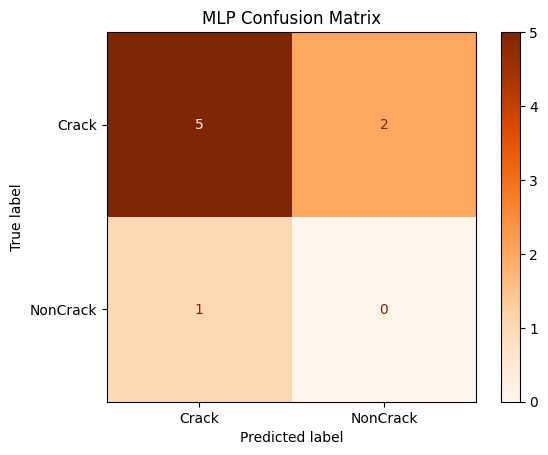

In [9]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load CSV file with header
data = pd.read_csv("/content/samplePLUS.csv")

# Step 2: Clean up and rename columns if needed
data.columns = ['Capacitance', 'Humidity', 'Temperature', 'Thickness', 'CrackType']
data.columns = data.columns.str.strip()

# Step 3: Encode crack types to numeric classes
label_encoder = LabelEncoder()
data['CrackType'] = label_encoder.fit_transform(data['CrackType'])

# Step 4: Split features and labels
X = data[['Capacitance', 'Humidity', 'Temperature', 'Thickness']].values
y = data['CrackType'].values

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Step 8: Define model
mlp_model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, len(set(y)))  # auto set output size by unique class count
)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=0.01)

# Step 9: Training loop
for epoch in range(300):
    mlp_model.train()
    y_pred = mlp_model(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

# Step 10: Evaluation
mlp_model.eval()
with torch.no_grad():
    y_test_pred = mlp_model(X_test)
    y_pred_classes = torch.argmax(y_test_pred, dim=1)
    accuracy = (y_pred_classes == y_test).float().mean()
    print(f"\nTest Accuracy: {accuracy.item() * 100:.2f}%")

    # Decode labels for printing
    predicted_labels = label_encoder.inverse_transform(y_pred_classes.numpy())
    actual_labels = label_encoder.inverse_transform(y_test.numpy())

    print("\nPredictions vs Actual:")
    for actual, predicted in zip(actual_labels, predicted_labels):
        print(f"Actual: {actual}, Predicted: {predicted}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Run prediction (you already have this after training)
mlp_model.eval()
with torch.no_grad():
    y_pred_mlp = mlp_model(X_test)
    predicted_classes = torch.argmax(y_pred_mlp, dim=1)

# Confusion Matrix
cm = confusion_matrix(y_test.numpy(), predicted_classes.numpy())
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap='Oranges')
plt.title("MLP Confusion Matrix")
plt.show()



